# Determining the Most Profitable Oil Extraction Region

The dataset provides oil samples from three regions: each has 10,000 fields where the quality of the oil and the amount of oil reserves have been measured. You need to build a machine learning model that will help you identify the region where production will yield the highest profit.  And also analyze the possible profits and risks with the *Bootstrap.* technique.

Steps to select a location:

- In the selected region, look for deposits, and determine feature values for each;
- Build a model and estimate the volume of reserves;
- Select the fields with the highest estimated values. The number of fields depends on the company's budget and the cost of developing one well;
- Profit is equal to the total profit of the selected fields.

## Preparing data

In [1]:
# import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# import models:
from sklearn.linear_model import LinearRegression

# import analysis tools:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

Let's examine the resulting datasets:

1) output the general information using the info() method;

2) look at the first 5 rows;

3) check the distribution of data in numeric columns using the hist() method;

4) check for explicit (using the duplicated() method) and implicit duplicates (using the 'id' column);

5) find out if there is a correlation between the column data using the corr() method.


In [3]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


There are no missing values. Column names do not need to be corrected.

In [4]:
region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


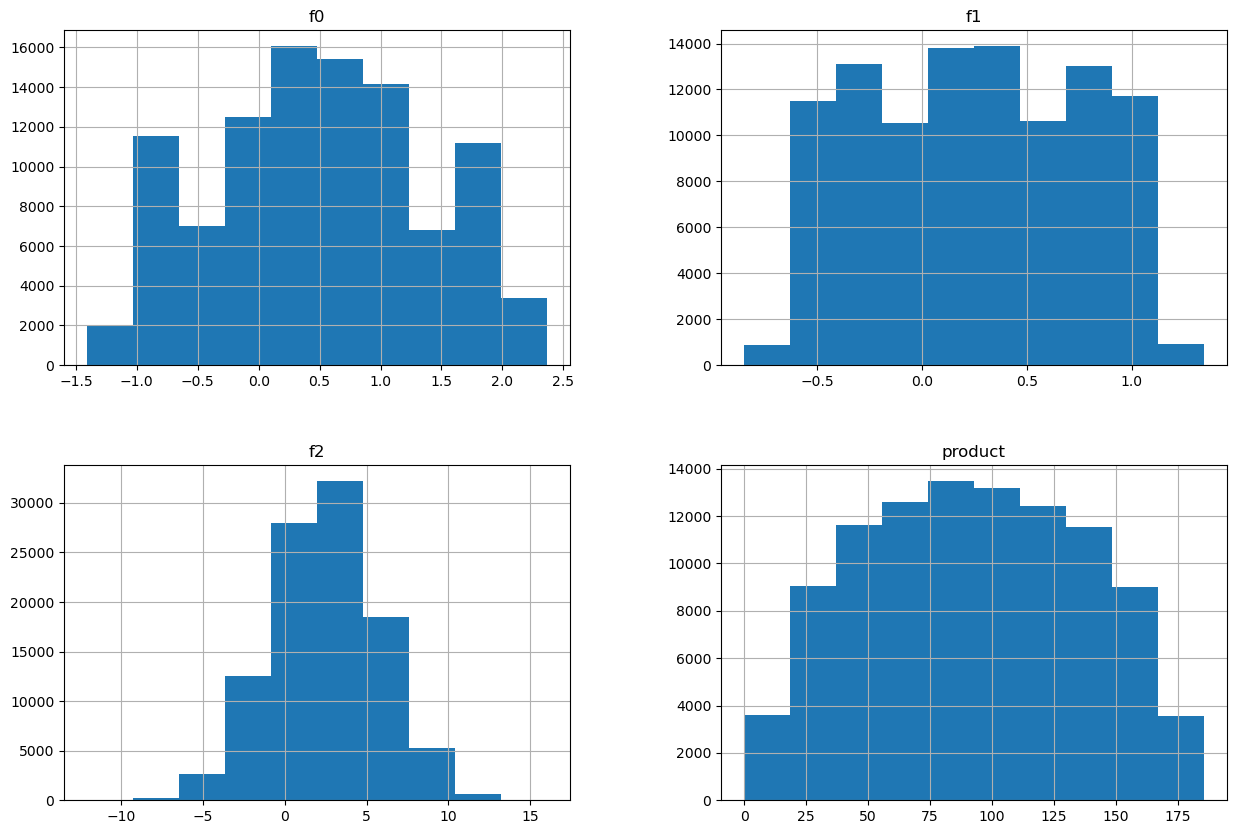

In [5]:
region_1.hist(figsize=(15,10));

Column 'f0' values: -1.4 to 2.4, most of the data takes the value 0.5.

Column 'f1' values: -0.8 to 1.4, most of the data takes the value 0.3.

Column 'f2' values: -12 to 16, most of the data takes the value 0.5.

Values of the 'product' column: from 0 to 185, most of the data takes a value around 90.

Let's build a 'whisker box' to see if there are outliers in the data:

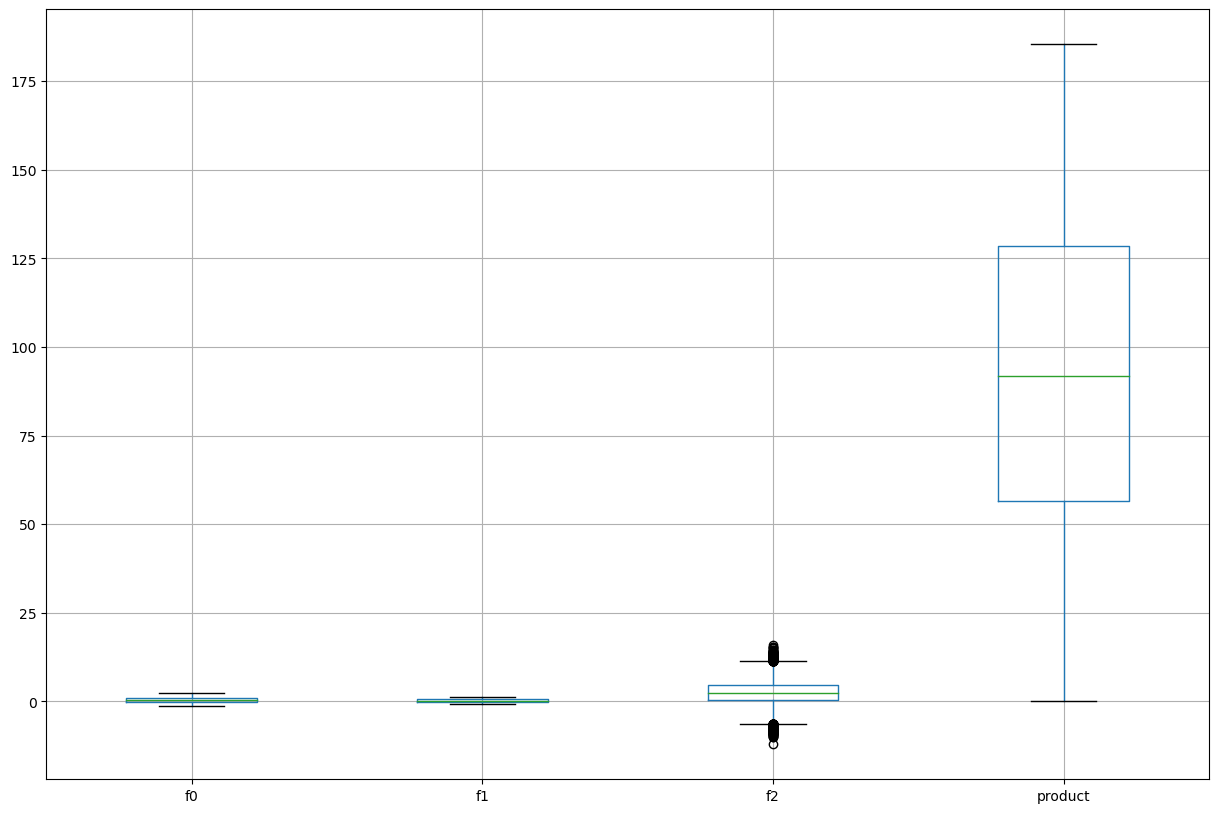

In [6]:
region_1.boxplot(figsize=(15,10));

There are a significant number of outliers in the 'f2' column

We'll run a check for duplicates:

In [7]:
region_1.duplicated().sum()

0

No explicit ones have been identified. Let's search for implicit duplicates by the 'id' column:

In [8]:
region_1['id'].value_counts().sum()

100000

All values are unique. There are no implicit duplicates. The 'id' column data will not be used for model training, so it can be excluded from the set.

In [9]:
region_1 = region_1.drop(['id'], axis=1)

Let's see if there is a correlation between the columns:

In [10]:
region_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


We found a weak correlation between columns 'f0' and 'f1': the correlation coefficient is -0.44. The correlation is inversely proportional.
Taking into account that by the condition all signs are significant, and the mutual influence is weak, we leave the dataframe unchanged.

Let's proceed to the data of the second region. The logic and sequence of actions will be the same.

In [11]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


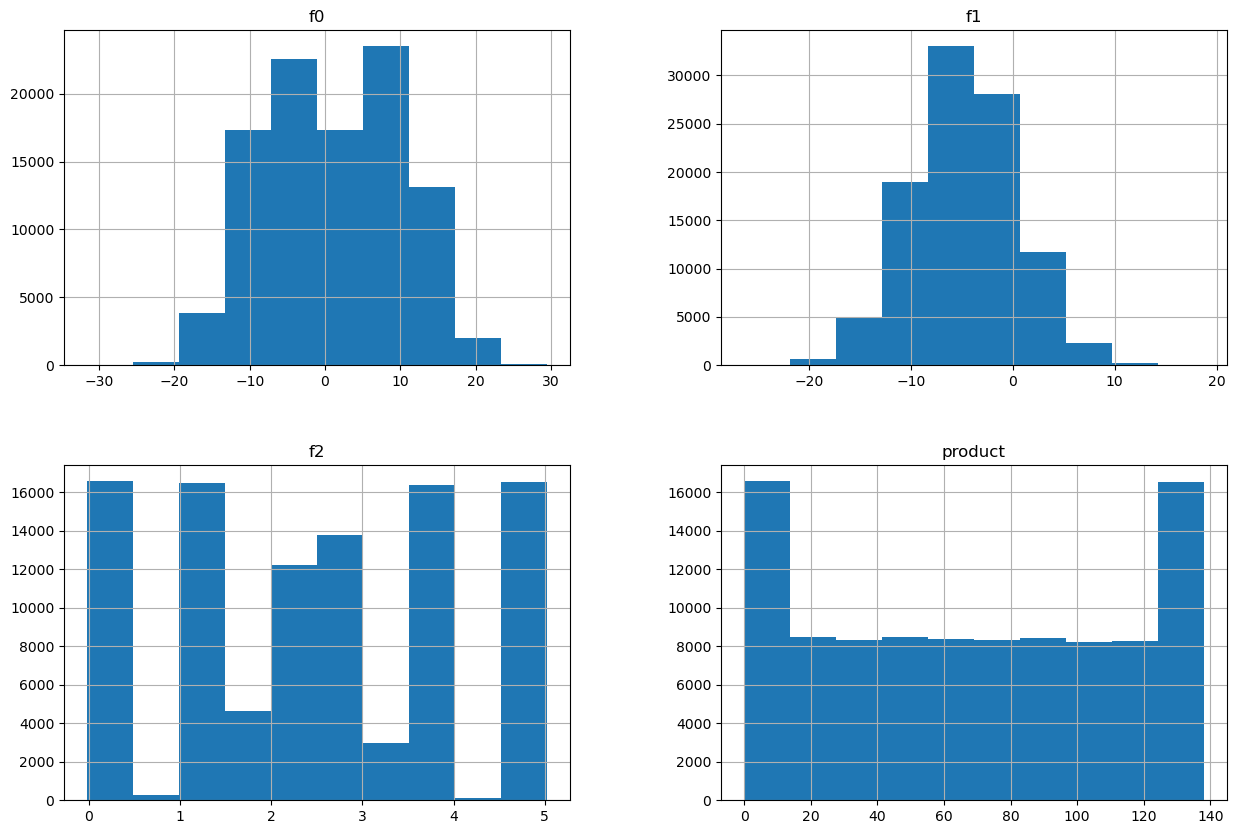

In [13]:
region_2.hist(figsize=(15,10));

Column 'f0' values: -31 to 29, most of the data takes value 1.

Column 'f1' values: -26 to 19, most of the data takes the value of -4.

Column 'f2' values: 0 to 5, most of the data takes the value 2.5.

Values of column 'product': from 0 to 138, most of the data takes the value of about 70.

Let's build a 'whisker box' to see if there are outliers in the data:

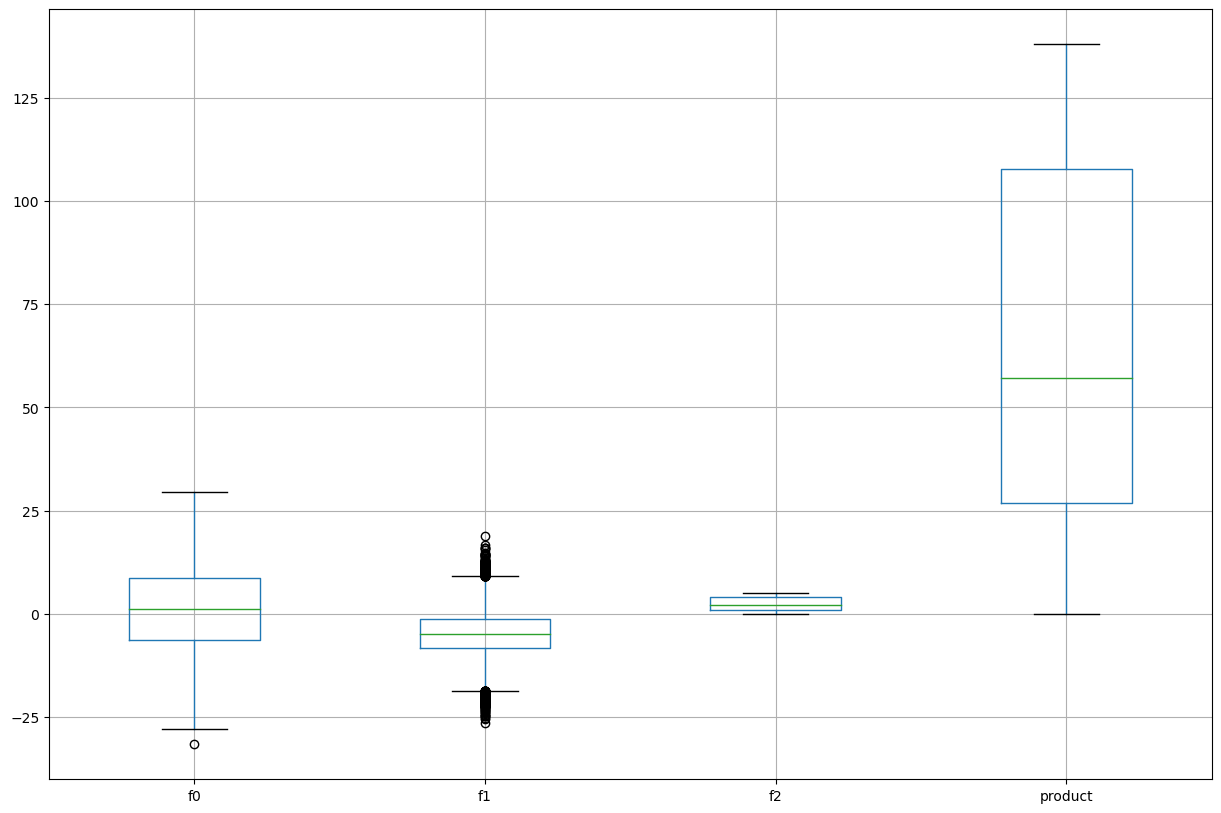

In [14]:
region_2.boxplot(figsize=(15,10));

There is a significant amount of outliers in the 'f1' column. There is also a noticeable outlier in the 'f1' column.

In [15]:
region_2.duplicated().sum()

0

In [16]:
region_2['id'].value_counts().sum()

100000

In [17]:
region_2 = region_2.drop(['id'], axis=1)

In [18]:
region_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


No significant relationships were found. Let's move on to the third region:

In [19]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [20]:
region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


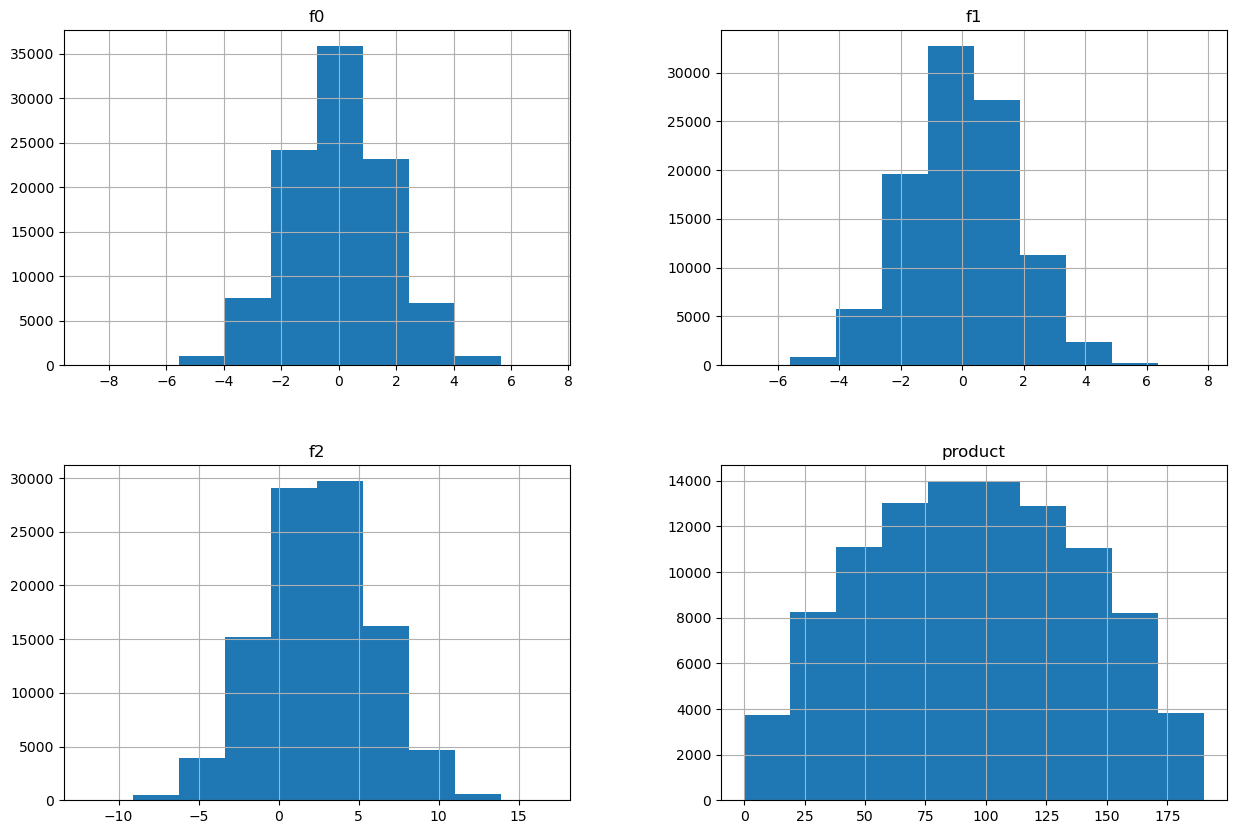

In [21]:
region_3.hist(figsize=(15,10));

Column 'f0' values: -9 to 7, most of the data takes value 0.

Column 'f1' values: -7 to 8, most of the data takes value 0.

Column 'f2' values: -12 to 17, most of the data takes the value 2.5.

Values of column 'product': from 0 to 190, most of the data takes the value of about 95.

Let's build a 'whisker box' to see if there are outliers in the data:

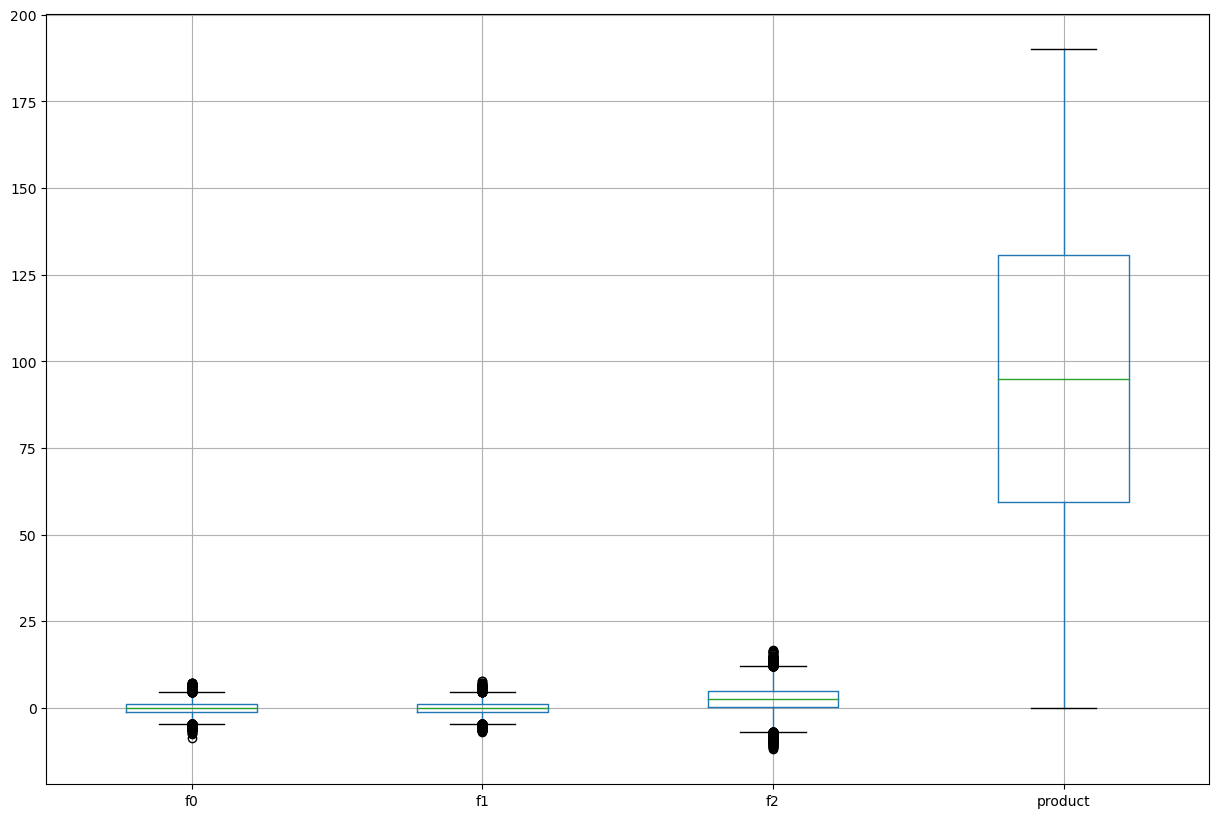

In [22]:
region_3.boxplot(figsize=(15,10));

In all columns except 'product', we observe a significant number of outliers. 

In [23]:
region_3.duplicated().sum()

0

In [24]:
region_3['id'].value_counts().sum()

100000

In [25]:
region_3 = region_3.drop(['id'], axis=1)

In [26]:
region_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


No significant relationships were found.

After examining the total information for the three regions, we found that there are wells with zero oil reserves (the value in the 'product' column is zero). Let's check their number and share in each region:

In [27]:
# create a function to check the number and proportion of null values in a column:
# it takes a dataset and a column name as input and returns the number and fraction of null values

def nulls_test(data, column):
    nulls = data[data[column] == 0][column].count()
    percent = nulls / data.shape[0]
    print('Number of null values in column:', nulls)
    print('Percentage of null values:', round(percent*100), '%')

In [28]:
nulls_test(region_1, 'product')

Number of null values in column: 1
Percentage of null values: 0 %


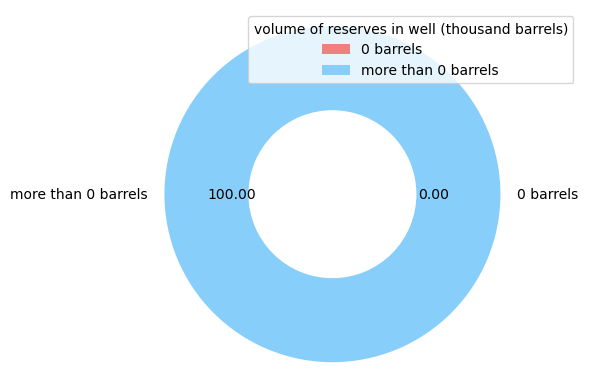

In [29]:
colors = ['lightcoral', 'lightskyblue']

labels = ['0 barrels', 'more than 0 barrels']
 
values = [len(region_1.loc[region_1['product']==0]), len(region_1.loc[region_1['product']!=0])]


plt.pie(values, labels=labels, colors=colors, autopct='%.2f', wedgeprops=dict(width=0.5))
plt.legend(title="volume of reserves in well (thousand barrels)")
plt.axis('equal')
plt.show()

In [30]:
nulls_test(region_2, 'product')

Number of null values in column: 8235
Percentage of null values: 8 %


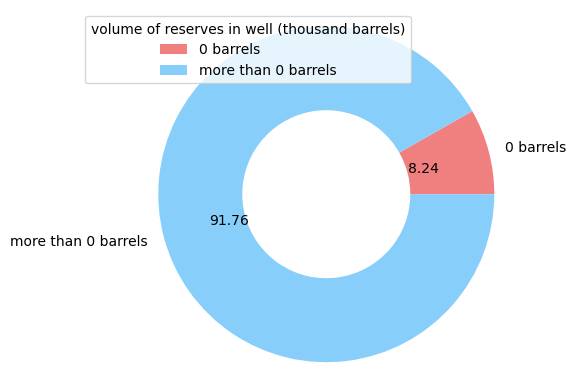

In [31]:
colors = ['lightcoral', 'lightskyblue']

labels = ['0 barrels', 'more than 0 barrels']
 
values = [len(region_2.loc[region_2['product']==0]), len(region_2.loc[region_2['product']!=0])]


plt.pie(values, labels=labels, colors=colors, autopct='%.2f', wedgeprops=dict(width=0.5))
plt.legend(title="volume of reserves in well (thousand barrels)")
plt.axis('equal')
plt.show()

In [32]:
nulls_test(region_3, 'product')

Number of null values in column: 1
Percentage of null values: 0 %


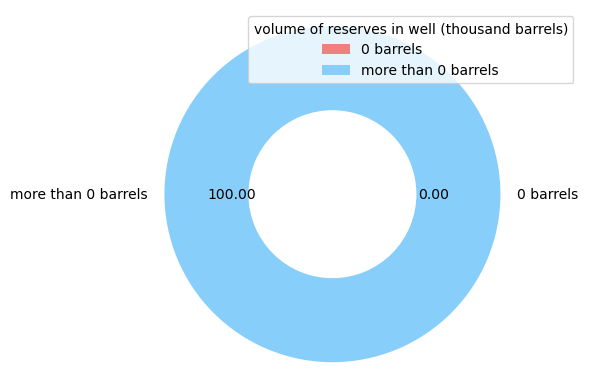

In [33]:
colors = ['lightcoral', 'lightskyblue']

labels = ['0 barrels', 'more than 0 barrels']
 
values = [len(region_3.loc[region_3['product']==0]), len(region_3.loc[region_3['product']!=0])]


plt.pie(values, labels=labels, colors=colors, autopct='%.2f', wedgeprops=dict(width=0.5))
plt.legend(title="volume of reserves in well (thousand barrels)")
plt.axis('equal')
plt.show()

In the second region, more than 8% of properties with zero oil reserves were found - for a better assessment, it is necessary to clarify with the customer whether the fields are really empty or whether the data were not entered (or there were errors/technical failures).

In addition, the distribution of data in the 'product' column in the second region looks unrealistic.

Taking into account the specifics of the industry - extremely high/low values of raw material stocks may have a critical impact on the forecast result, so we will not 'clean' the dataset.

## Model training and validation

In [34]:
model = LinearRegression()

# to train models for 3 regions, create a function that takes as input a dataset and a column with a target feature:

def product_predict(df, column):
    
    # select features and target feature from the dataset:
    features = df.drop([column] , axis=1)
    target = df[column]
    
    # split the data into training and validation samples in the ratio 75/25:
    
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=12345)
    # train the model:
    model.fit(features_train, target_train)
    
    # normalize the features on the training sample:
    scaler = MinMaxScaler()
    features_train = scaler.fit_transform(features_train)
        
    # make predictions on the validation sample:
    predicted_target = model.predict(features_valid)
    
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    
    mean = data_frame['predicted_product'].mean()
       
    return data_frame, rmse, mean

In [35]:
i = 1
for region in [region_1, region_2, region_3]:
    print(f"Region {i}:")
    print()
    data, rsme, mean = product_predict(region, 'product')
    print(data.head())
    print()
    print('RSME:', round(rsme))
    print()
    print('Average predicted raw material reserves (thousand barrels):', round(mean))
    print()
    print('Total actual reserves (thousand barrels):', round(sum(data['real_product'])))
    print()
    print('Total predicted reserves (thousand barrels):', round(sum(data['predicted_product'])))
    print()
    print('Delta (thousand barrels):', round(sum(data['predicted_product']) - sum(data['real_product'])))
    print("-----------------------\n\n")
    i+=1 

Region 1:

       real_product  predicted_product
71751     10.038645          95.894952
80493    114.551489          77.572583
2655     132.603635          77.892640
53233    169.072125          90.175134
91141    122.325180          70.510088

RSME: 38

Average predicted raw material reserves (thousand barrels): 93

Total actual reserves (thousand barrels): 2301965

Total predicted reserves (thousand barrels): 2314814

Delta (thousand barrels): 12849
-----------------------


Region 2:

       real_product  predicted_product
71751     80.859783          82.663314
80493     53.906522          54.431786
2655      30.132364          29.748760
53233     53.906522          53.552133
91141      0.000000           1.243856

RSME: 1

Average predicted raw material reserves (thousand barrels): 69

Total actual reserves (thousand barrels): 1718078

Total predicted reserves (thousand barrels): 1718214

Delta (thousand barrels): 135
-----------------------


Region 3:

       real_product  predi

Based on the difference between the obtained and actual values of the total crude reserves estimate, we conclude that the model makes fairly accurate predictions.

The most accurate predictions were obtained from the data of the 2nd region (with the minimum RSME values (1) and the minimum delta (135 thousand barrels) compared to the other two regions). However, the average crude stock in Region 2 was the lowest. In addition, we raised concerns above about the quality of the data in the second region (not normally distributed).

## Preparing for profit calculation

According to the data received from the customer:

In [36]:
budget = 10**10 # budget for well development in the region
income_per_barrel = 450 * 10**3 #price per 1000 barrels of raw material
n_of_wells = 500 # number of points to develop
n_of_best_wells = 200 # number of best wells to develop

Let's calculate the break-even point for the development of raw materials at 200 fields and the average volume of oil required to reach the break-even point. The break-even point is calculated by equating to zero the difference between the budget and the product of income per barrel by the number of barrels (income per barrel * n). Let's calculate n:

In [37]:
n = budget / income_per_barrel
print("Break-even point for the region: {0:.0f} thousand barrels".format(round(n)))

Break-even point for the region: 22222 thousand barrels


In [38]:
print("The average volume of oil in the well required to reach the break-even point is", \
      np.ceil(n/n_of_best_wells), 'thousand barrels')

The average volume of oil in the well required to reach the break-even point is 112.0 thousand barrels


Let's display the average data on real raw material reserves in each region:

In [39]:
print('Average crude stock in region 1:', round(region_1['product'].mean()), 'thousand barrels')
print('Average crude stock in region 2:', round(region_2['product'].mean()), 'thousand barrels')
print('Average crude stock in region 3:', round(region_3['product'].mean()), 'thousand barrels')

Average crude stock in region 1: 93 thousand barrels
Average crude stock in region 2: 69 thousand barrels
Average crude stock in region 3: 95 thousand barrels


The average stock of raw materials in the wells is less than that required to reach the break-even point. Let's check how the data are distributed:

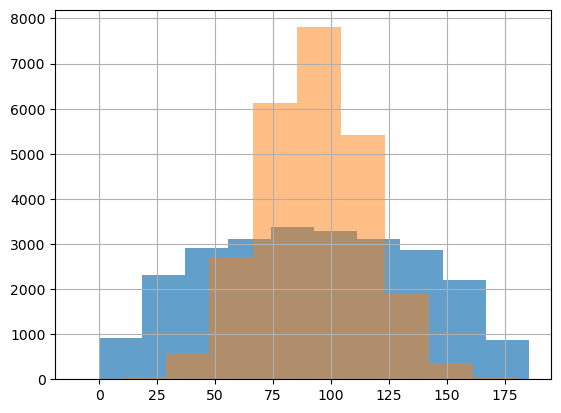

In [40]:
# Region 1:
data, rsme, mean = product_predict(region_1, 'product')
data['real_product'].hist(alpha=0.7);
data['predicted_product'].hist(alpha=0.5);

In [41]:
print ('Number of points in the region where the predicted raw material volume is higher than necessary to reach the break-even point:',\
       data[data['predicted_product'] >= 112]['predicted_product'].count())
print ('Share of such points in the total set of predicted values:',\
       round(data[data['predicted_product'] >= 112]['predicted_product'].count()/len(data['predicted_product'])*100), '%')

Number of points in the region where the predicted raw material volume is higher than necessary to reach the break-even point: 5123
Share of such points in the total set of predicted values: 20 %


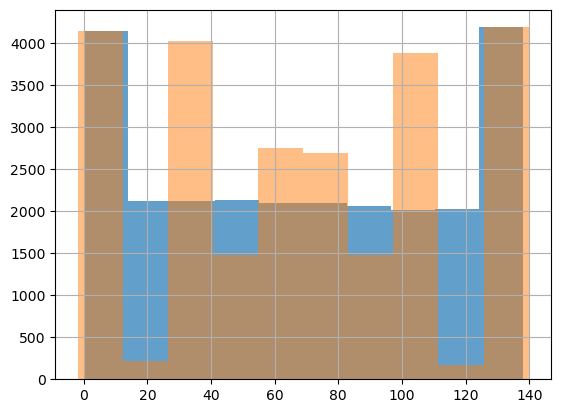

In [42]:
# Region 2:
data, rsme, mean = product_predict(region_2, 'product')
data['real_product'].hist(alpha=0.7);
data['predicted_product'].hist(alpha=0.5);

In [43]:
print ('Number of points in the region where the predicted raw material volume is higher than necessary to reach the break-even point:',\
       data[data['predicted_product'] >= 112]['predicted_product'].count())
print ('Share of such points in the total set of predicted values:',\
       round(data[data['predicted_product'] >= 112]['predicted_product'].count()/len(data['predicted_product'])*100), '%')

Number of points in the region where the predicted raw material volume is higher than necessary to reach the break-even point: 4222
Share of such points in the total set of predicted values: 17 %


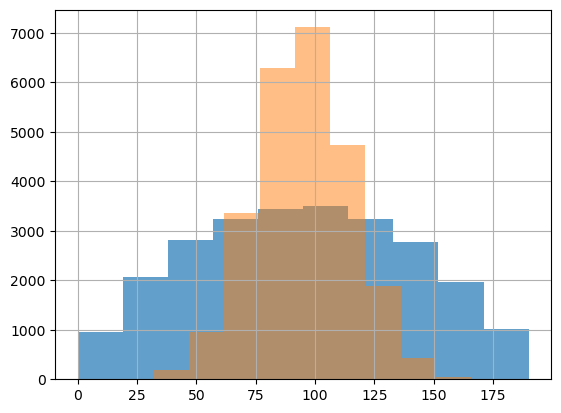

In [44]:
# Region 3:
data, rsme, mean = product_predict(region_3, 'product')
data['real_product'].hist(alpha=0.7);
data['predicted_product'].hist(alpha=0.5);

In [45]:
print ('Number of points in the region where the predicted raw material volume is higher than necessary to reach the break-even point:',\
       data[data['predicted_product'] >= 112]['predicted_product'].count())
print ('Share of such points in the total set of predicted values:',\
       round(data[data['predicted_product'] >= 112]['predicted_product'].count()/len(data['predicted_product'])*100), '%')

Number of points in the region where the predicted raw material volume is higher than necessary to reach the break-even point: 4944
Share of such points in the total set of predicted values: 20 %


For all regions, it is reasonable to conclude that there is a high probability of cost recovery, as there are a sufficient number of wells with reserves above the break-even point.

## Profit and risk calculation

Let's write a function to calculate the profit for the selected wells and model predictions:
- select the wells with the maximum predictions;
- summarize the target value of raw material volume corresponding to these predictions;
- calculate the profit for the obtained volume of raw materials.

In [46]:
def profit_func(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return income_per_barrel * selected.sum() - budget

In [47]:
data, rsme, mean = product_predict(region_1, 'product')
target = data['real_product']
predictions = data['predicted_product']

In [48]:
state = np.random.RandomState(12345)

Let's write a function to determine the average profit and risk using Bootstrap techniques:

In [49]:
def average_profit_risk_est(target, predictions):

    values = []
    
    for i in range(1000):
        target_subsample = target.sample(n_of_wells, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        profit = profit_func(target_subsample, predictions_subsample, n_of_best_wells)
        values.append(profit)
    values = pd.Series(values)

    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = (values < 0).mean()
    mean = values.mean()

    return (mean, lower, upper, risk)

In [50]:
mean, lower, upper, risk = average_profit_risk_est(target, predictions)

print('Region 1')
print('The average forecast profit value for the region is: {:.2f} thousand rubles'.format(mean))
print('With 95% probability profit(loss) will be from {:.2f} to {:.2f} thousand rubles.'.format(lower, upper))
print('Risk of loss {:.2%}'.format(risk))

Region 1
The average forecast profit value for the region is: 425938526.91 thousand rubles
With 95% probability profit(loss) will be from -102090094.84 to 947976353.36 thousand rubles.
Risk of loss 6.00%


In [51]:
data, rsme, mean = product_predict(region_2, 'product')
target = data['real_product']
predictions = data['predicted_product']

In [52]:
mean, lower, upper, risk = average_profit_risk_est(target, predictions)

print('Region 2')
print('The average predicted profit value for the region is: {:.2f} thousand.rub.'.format(mean))
print('With 95% probability profit(loss) will be from {:.2f} to {:.2f} thousand rubles.'.format(lower, upper))
print('Risk of loss {:.2%}'.format(risk))

Region 2
The average predicted profit value for the region is: 518259493.70 thousand.rub.
With 95% probability profit(loss) will be from 128123231.43 to 953612982.07 thousand rubles.
Risk of loss 0.30%


In [53]:
data, rsme, mean = product_predict(region_3, 'product')
target = data['real_product']
predictions = data['predicted_product']

In [54]:
mean, lower, upper, risk = average_profit_risk_est(target, predictions)

print('Region 3')
print('The average predicted profit value for the region is: {:.2f} thousand.rub.'.format(mean))
print('With 95% probability profit(loss) will be from {:.2f} to {:.2f} thousand rubles.'.format(lower, upper))
print('Risk of loss {:.2%}'.format(risk))

Region 3
The average predicted profit value for the region is: 420194005.34 thousand.rub.
With 95% probability profit(loss) will be from -115852609.16 to 989629939.84 thousand rubles.
Risk of loss 6.20%


Regions 1 and 3 have a significant risk of loss at the 95% confidence interval.
Region 2 looks attractive for investment, since with a low risk of loss the average profit is higher than in the other two regions.

## Conclusion

A study of oil well data was conducted in three regions to measure the quality of oil and the volume of its reserves in order to determine the region that would yield the highest profit.

The work consists of 4 stages:

**1) Data Loading and Preparation**

Three datasets were created with sets of data from 10,000 oil fields in each of the three regions. The distribution, presence of duplicates, and correlations were checked.

After studying the general information for the three regions, it was discovered that there were wells with zero oil reserves (the value in the 'product' column was zero). It was found that in the second region, more than 8% of the objects had zero oil reserves, indicating a need for clarification from the client: whether the fields are indeed empty or if there were data entry errors/technical glitches. Additionally, the data distribution in the 'product' column for the second region appeared unrealistic. Extremely high and low values were not removed, considering that these values could have a critical impact on the prediction results.

**2) Training and Testing of Linear Regression Model for Each Region**

The data were split into training and validation sets at a 75:25 ratio. A model was trained, and predictions were made and saved on the validation set. The average and total predicted and actual raw material reserves were calculated, along with the delta between them. The root mean square error (RSME) of the model was also calculated. The results are presented below:

    Region 1:

    real_product  predicted_product
    10.038645           95.894952
    114.551489          77.572583
    132.603635          77.892640
    169.072125          90.175134
    122.325180          70.510088

RSME: 38

Average predicted raw material reserves (thousand barrels): 93

Total actual reserves (thousand barrels): 2,301,965

Total predicted reserves (thousand barrels): 2,314,814

Delta (thousand barrels): 12,849

    Region 2:

     real_product  predicted_product
     80.859783          82.663314
     53.906522          54.431786
     30.132364          29.748760
     53.906522          53.552133
     0.000000           1.243856

RSME: 1

Average predicted raw material reserves (thousand barrels): 69

Total actual reserves (thousand barrels): 1,718,078

Total predicted reserves (thousand barrels): 1,718,214

Delta (thousand barrels): 135

    Region 3:

     real_product  predicted_product
     61.212375          93.599633
     41.850118          75.105159
     57.776581          90.066809
    100.053761         105.162375
    109.897122         115.303310

RSME: 40

Average predicted raw material reserves (thousand barrels): 95

Total actual reserves (thousand barrels): 2,372,106

Total predicted reserves (thousand barrels): 2,374,126

Delta (thousand barrels): 2,020

Based on the difference between the obtained and actual values in the total assessment of raw material reserves, it can be concluded that the model makes reasonably accurate predictions.

The most accurate predictions were obtained for the data in the second region (with the lowest RSME value of 1 and the smallest delta of 135 thousand barrels compared to the other two regions). However, the average raw material reserves in the second region turned out to be the lowest. Furthermore, concerns were raised earlier regarding the quality of the data in the second dataset (non-normal distribution).

**3) Preparation for Profit Calculation**

The volume of raw material for break-even development of a new well was calculated, assuming a budget of 10 billion for the development of one region, which is 112.0 thousand barrels. The average raw material reserves were calculated for each region:

In Region 1: 93 thousand barrels
In Region 2: 69 thousand barrels
In Region 3: 95 thousand barrels

Despite the fact that the average reserves in the wells are less than what is needed to achieve break-even, it is concluded that there is a probability of recouping the costs for all regions, as there are a sufficient number of wells with reserves higher than those needed to break even.

**4) Profit and Risk Calculation**

Wells with the maximum prediction values were selected. The target values corresponding to these predictions were summed, and profit was calculated for the obtained volume of raw material. The average profit and risk were determined using the Bootstrap technique.

In Regions 1 and 3, there is a significant risk of incurring losses at a 95% confidence interval.

Region 2 appears to be an attractive investment because it has a low risk of incurring losses, and the average profit is higher than in the other two regions. However, considering the aforementioned doubts about the data quality in the second dataset, it is recommended to verify its quality before making a positive decision on the development of deposits in Region 2.